<a href="https://colab.research.google.com/github/HVD27/pima-indians-diabetes/blob/main/prima_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
!pip install scikit-plot
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt

%matplotlib inline

In [5]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
def Data_work(): 
  df = pd.read_csv('/content/drive/MyDrive/data/diabetes.csv')
  col_norm =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
  df_norm = df[col_norm]
  df1_norm = df[col_norm].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )
  Y_Data = df["Outcome"]
  X_Data = df1_norm
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data,Y_Data, test_size=0.3,random_state=101)

  return X_Train, X_Test, Y_Train, Y_Test

In [39]:
def feat_map():
  feat_Pregnancies = tf.feature_column.numeric_column('Pregnancies')
  feat_Glucose = tf.feature_column.numeric_column('Glucose')
  feat_BloodPressure = tf.feature_column.numeric_column('BloodPressure')
  feat_SkinThickness_tricep = tf.feature_column.numeric_column('SkinThickness')
  feat_Insulin = tf.feature_column.numeric_column('Insulin')
  feat_BMI = tf.feature_column.numeric_column('BMI')
  feat_DiabetesPedigreeFunction  = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
  feat_Age = tf.feature_column.numeric_column('Age')

  feature_column = [feat_Pregnancies, feat_Glucose, feat_BloodPressure, 
                  feat_SkinThickness_tricep, feat_Insulin, 
                 feat_BMI , feat_DiabetesPedigreeFunction, feat_Age]
  return feature_column


In [45]:
X_Train, X_Test, Y_Train, Y_Test = Data_work()
feature_column = feat_map()
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_Train, 
                                                 Y_Train,
                                                 batch_size=50,
                                                 num_epochs=1000,
                                                 shuffle=True)

predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X_Test,
      num_epochs=1,
      shuffle=False)

In [46]:
dnnmodel = tf.estimator.DNNClassifier(
                                      hidden_units = [20,20],
                                      feature_columns = feature_column,
                                      n_classes = 2,
                                      activation_fn=tf.nn.softmax,
                                      dropout= None,
                                      optimizer = tf.optimizers.Adam(learning_rate=0.01)
                                      )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppvp2dmu1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [47]:
history = dnnmodel.train(input_fn=input_func, steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppvp2dmu1/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6944779, step = 0
INFO:tensorflow:global_step/sec: 228.433
INFO:tensorflow:loss = 0.6253004, step = 100 (0.441 sec)
INFO:tensorflow:global_step/sec: 275.726
INFO:tensorflow:loss = 0.5789505, step = 200 (0.373 sec)
INFO:tensorflow:global_step/sec: 276.14
INFO:tensorflow:loss = 0.5254495, step = 300 (0.355 sec)
INFO:tensorflow:global_step/sec: 334.185
INFO:tensorflow:loss = 0.45430166, step = 400 (0.296 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 500...
INFO:tensorflow:Saving chec

In [49]:
eval_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_Test,
                                               Y_Test,
                                               batch_size=10,
                                               num_epochs=1,
                                               shuffle=False)
dnnmodel.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-10-19T19:12:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppvp2dmu1/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.72181s
INFO:tensorflow:Finished evaluation at 2021-10-19-19:12:48
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.7878788, accuracy_baseline = 0.64935064, auc = 0.85255146, auc_precision_recall = 0.7647027, average_loss = 0.4540346, global_step = 500, label/mean = 0.35064936, loss = 0.45362565, precision = 0.7352941, prediction/mean = 0.33575824, recall = 0.61728394
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: /tmp/tmppvp2dmu1/model.ckpt-500


{'accuracy': 0.7878788,
 'accuracy_baseline': 0.64935064,
 'auc': 0.85255146,
 'auc_precision_recall': 0.7647027,
 'average_loss': 0.4540346,
 'global_step': 500,
 'label/mean': 0.35064936,
 'loss': 0.45362565,
 'precision': 0.7352941,
 'prediction/mean': 0.33575824,
 'recall': 0.61728394}

In [50]:
predictions = list(dnnmodel.predict(input_fn=predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]
data = classification_report(Y_Test,prediction)
conmat = confusion_matrix(Y_Test,prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppvp2dmu1/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


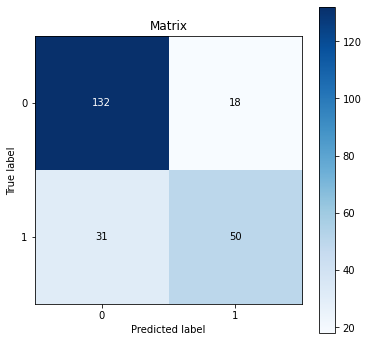

In [52]:
skplt.metrics.plot_confusion_matrix(Y_Test, 
                                    prediction,
                                   figsize=(6,6),
                                   title="Matrix")

In [53]:
print(data)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       150
           1       0.74      0.62      0.67        81

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231

